In [1]:
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def complexity(DSM):
    DSM =np.array(DSM)
    DSM = np.nan_to_num(DSM)
    C1 = np.trace(DSM) #Component Complexity on the diagonal of the DSM
    np.fill_diagonal(DSM,0) # Clear Diagonal to calculate SVD and C2
    C2 = np.nansum(DSM) #Interface Complexity
    SVD = np.linalg.svd(DSM>0, compute_uv=False) # SVD only in the architecture topology, no weight given to each interface
    C3 = sum(SVD)/len(DSM) #Architecture (Topological) Complexity
    return {'C':C1+C2*C3,'C1':C1,'C2':C2,'C3':C3,'C2*C3':C2*C3,'SVD':SVD}

#pump controler exemple
DSM = np.array([[5  ,0  ,1.5,0  ,0.5],
                [0  ,2  ,0.5,0  ,1.5],
                [2.5,1.5,1  ,.5 ,0. ],
                [0  ,  0,1.5,1  ,0. ],
                [1.5,.5 ,0  ,0  ,3. ]])
C = complexity(DSM)
print(f"System complexity: {C['C']:.3f} \n C1: {C['C1']} \n C2: {C['C2']} \n C3: {C['C3']:.3f}")

System complexity: 25.430 
 C1: 12.0 
 C2: 12.0 
 C3: 1.119


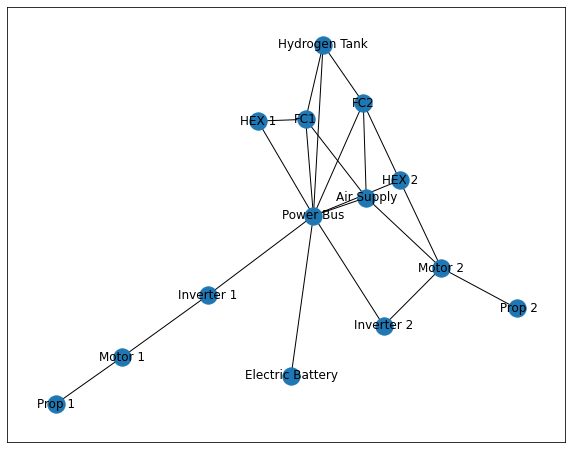

In [17]:
#Create an Adjacency Matrix based on DSM (slide 3)
DSM_adjacency_HyFIVE =np.array([[0,1,1,0,1,0,0,0,0,0,0,0,0,0], #H2 System
                                [1,0,0,0,1,0,0,0,0,0,0,1,0,1], #FC1
                                [1,0,0,0,1,0,0,0,0,0,0,0,1,1], #FC2
                                [0,0,0,0,1,0,0,0,0,0,0,0,0,0], #Battery
                                [1,1,1,1,0,1,1,0,0,0,0,1,1,1], #E-Power Mgmt
                                [0,0,0,0,1,0,0,1,0,0,0,0,0,0], #Inverter 1
                                [0,0,0,0,1,0,0,0,1,0,0,0,0,0], #Inverter 2
                                [0,0,0,0,0,1,0,0,0,1,0,0,0,0], #Motor 1
                                [0,0,0,0,0,0,1,0,0,0,1,0,0,0], #Motor 2
                                [0,0,0,0,0,0,0,1,0,0,0,0,0,0], #Prop 1
                                [0,0,0,0,0,0,0,0,1,0,0,0,0,0], #Prop 2
                                [0,1,0,0,1,0,0,0,0,0,0,0,0,0], #HEX1
                                [0,0,1,0,1,0,0,0,0,0,0,0,0,0], #HEX2
                                [0,1,1,0,1,0,0,0,0,0,0,0,0,0]]) #O2
                               
labels = ['Hydrogen Tank', 'FC1', 'FC2', 'Electric Battery', 'Power Bus', 'Inverter 1', 'Inverter 2', 'Motor 1', 'Motor 2', 'Prop 1', ' Prop 2','HEX 1', 'HEX 2', 'Air Supply']
DSM_HyFIVE = pd.DataFrame(DSM_adjacency_HyFIVE, index=labels, columns=labels)
## Plot Graph with Labels
plt.figure(1, figsize=(10,8))
nx.draw_networkx(nx.from_pandas_adjacency(DSM_HyFIVE))


